In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('1000_ml_jobs_us.csv')

In [8]:
df[['job_description_text', 'seniority_level']].head()

,job_description_text,seniority_level
0,OverviewUpper Hand is embarking on an exciting...,Internship
1,Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level
2,Our CompanyChanging the world through digital ...,Entry level
3,Waymo is an autonomous driving technology comp...,Entry level
4,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level


In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    if not isinstance(text, str):
        return ""
    doc = nlp(text.lower())
    return ' '.join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

df['cleaned_description'] = df['job_description_text'].apply(preprocess)


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_description'])

y = df['seniority_level']

In [11]:
# Combine features and labels into a single DataFrame temporarily
combined = pd.DataFrame(X.toarray())  # Convert sparse matrix to DataFrame
combined['seniority_level'] = y.values

# Drop rows with any NaNs
combined = combined.dropna()

# Split features and target again
X_clean = combined.drop('seniority_level', axis=1)
y_clean = combined['seniority_level']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

       Associate       0.50      0.12      0.20         8
        Director       1.00      1.00      1.00         1
     Entry level       0.52      0.57      0.54        54
      Internship       1.00      0.60      0.75        20
Mid-Senior level       0.58      0.76      0.66        71
  Not Applicable       1.00      0.68      0.81        44

        accuracy                           0.65       198
       macro avg       0.77      0.62      0.66       198
    weighted avg       0.70      0.65      0.65       198



In [13]:
new_job = """
We are seeking a highly experienced machine learning engineer to lead cross-functional teams,
optimize production ML pipelines, and manage junior developers. Must have 5+ years of experience.
"""


In [14]:
cleaned = preprocess(new_job)


In [15]:
new_X = vectorizer.transform([cleaned])


In [16]:
predicted_label = model.predict(new_X)
print(f"Predicted Seniority Level: {predicted_label[0]}")


Predicted Seniority Level: Mid-Senior level


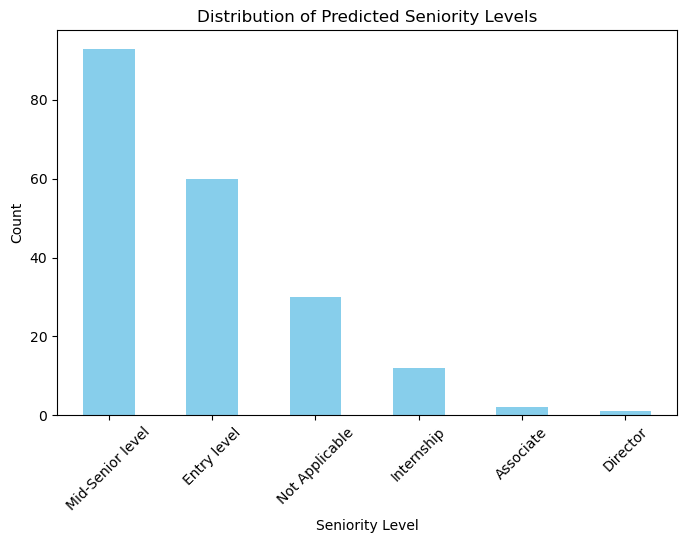

In [17]:

import matplotlib.pyplot as plt
# Convert to Series for easy plotting
pred_series = pd.Series(y_pred)

# Plot frequency of predicted classes
plt.figure(figsize=(8, 5))
pred_series.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Predicted Seniority Levels')
plt.xlabel('Seniority Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
